In [262]:
import pandas as pd
import numpy as np

df = pd.read_csv('clean_dataset.csv')


In [263]:
df['Injury'].value_counts()

Injury
Mortal                                                                                                                                                                                                                                                                                                                                    3193
Nan                                                                                                                                                                                                                                                                                                                                       1592
No Mortal                                                                                                                                                                                                                                                                                                                          

In [264]:
def map_function(injury):
    
    injury_dict = {
        'Mortal' : 0,
        'No Mortal' : 1,
        'Nan' : np.nan,
        'Fatal' : 0,
        'Non-Mortal' : 1,
        '"No Mortal"' : 1,
        '"Nan"' : np.nan
    }
    injury = injury.replace('"','')
    injury_clean = injury.strip()
    if injury_clean in injury_dict:
        return injury_dict.get(injury_clean, np.nan)
    else:
        return np.nan

df['Injury'] = df['Injury'].apply(lambda x : map_function(str(x)))


In [265]:
df.dropna(subset=['Injury'], inplace=True)

In [266]:
df_mode = df['Sex'].mode()
df["Sex"].replace({" M" : 'M', "M ": 'M', "Femal": "F", "F" : 'F', 'M': 'M', 'lli' : "M", 'M x 2' : "M", '.' : "M", 'N': "M"}, inplace = True)
df["Sex"].value_counts()
df.dropna(subset=['Sex'], inplace=True)

C:\Users\FX516\AppData\Local\Temp\ipykernel_18520\1169368524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sex"].replace({" M" : 'M', "M ": 'M', "Femal": "F", "F" : 'F', 'M': 'M', 'lli' : "M", 'M x 2' : "M", '.' : "M", 'N': "M"}, inplace = True)


In [268]:
# Paises, month, count()
from datetime import datetime
df_countries = df[df['Country'].isin(['USA','AUSTRALIA','SOUTH AFRICA'])]
df_countries['Month'] = pd.Categorical(df_countries['Month'],
                                       categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                       ordered=True)
df_country_pivot = df_countries.pivot_table(index=['Month'], columns='Country', values='Age', aggfunc=['count'])
df_country_pivot

C:\Users\FX516\AppData\Local\Temp\ipykernel_18520\3213841624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Month'] = pd.Categorical(df_countries['Month'],
C:\Users\FX516\AppData\Local\Temp\ipykernel_18520\3213841624.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_country_pivot = df_countries.pivot_table(index=['Month'], columns='Country', values='Age', aggfunc=['count'])


count                  
Country AUSTRALIA SOUTH AFRICA  USA
Month                              
Jan           151           65   41
Feb           103           36   42
Mar            88           29   79
Apr            85           37  100
May            45           23  111
Jun            50           21  170
Jul            42           30  268
Aug            46           16  232
Sep            56           19  199
Oct            81           16  153
Nov            98           25   72
Dec           133           47   47

In [269]:
month = list(df_country_pivot.index)
australia = df_country_pivot['count']['AUSTRALIA']
south_africa = df_country_pivot['count']['SOUTH AFRICA']
usa = df_country_pivot['count']['USA']


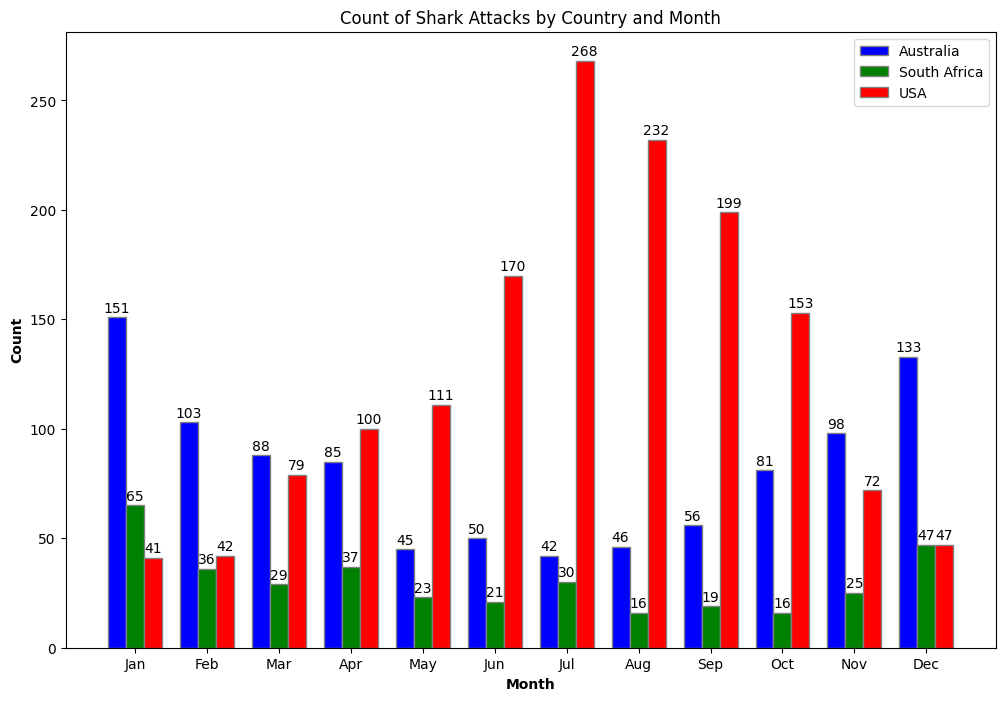

In [270]:
import matplotlib.pyplot as plt

# Suponiendo que los datos ya están definidos correctamente
month = list(df_country_pivot.index)
australia = df_country_pivot['count']['AUSTRALIA']
south_africa = df_country_pivot['count']['SOUTH AFRICA']
usa = df_country_pivot['count']['USA']

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

# Definir el ancho de las barras
bar_width = 0.25

# Definir las posiciones de las barras
r1 = np.arange(len(month))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
bars1 = plt.bar(r1, australia, color='blue', width=bar_width, edgecolor='grey', label='Australia')
bars2 = plt.bar(r2, south_africa, color='green', width=bar_width, edgecolor='grey', label='South Africa')
bars3 = plt.bar(r3, usa, color='red', width=bar_width, edgecolor='grey', label='USA')

# Añadir etiquetas encima de cada barra
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom')
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom')
for bar in bars3:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom')

# Añadir etiquetas
plt.xlabel('Month', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(month))], month)
plt.ylabel('Count', fontweight='bold')
plt.title('Count of Shark Attacks by Country and Month')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [271]:
# Sexo, edad, count()
# 
df_sex_age = df.groupby(['Sex','Age_Grouped'])['Age'].count().reset_index(name='count')
df_sex_age


,Sex,Age_Grouped,count
0,F,Adult,334
1,F,Child,54
2,F,Senior,20
3,F,Teen,82
4,M,Adult,3078
5,M,Child,152
6,M,Senior,67
7,M,Teen,474


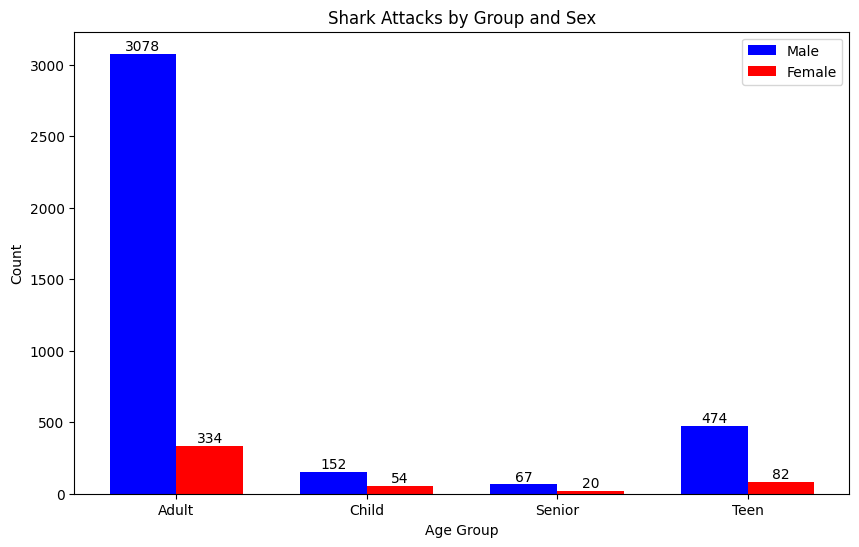

In [272]:
fig, ax = plt.subplots(figsize=(10, 6))
age_groups = df_sex_age['Age_Grouped'].unique()
bar_width = 0.35
positions = list(range(len(age_groups)))

for i, age_group in enumerate(age_groups):
    data_male = df_sex_age[(df_sex_age['Age_Grouped'] == age_group) & (df_sex_age['Sex'] == 'M')]['count'].values
    data_female = df_sex_age[(df_sex_age['Age_Grouped'] == age_group) & (df_sex_age['Sex'] == 'F')]['count'].values
    
    if len(data_male) > 0:
        bar_male = ax.bar(positions[i] - bar_width/2, data_male, color='blue', width=bar_width, label='Male' if i == 0 else "")
        for bar in bar_male:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom')
    
    if len(data_female) > 0:
        bar_female = ax.bar(positions[i] + bar_width/2, data_female, color='red', width=bar_width, label='Female' if i == 0 else "")
        for bar in bar_female:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom')

# Añadir etiquetas y título
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Shark Attacks by Group and Sex')
ax.set_xticks(positions)
ax.set_xticklabels(age_groups)
ax.legend()

# Mostrar el gráfico
plt.show()


In [280]:
# Paises por Mortalidad
df_country_count = df.groupby('Country')['Age'].count().reset_index(name='count')
df_country_count_filtered = df_country_count[(df_country_count['count'] > 25)] 
df_aux = df[df['Country'].isin(list(df_country_count_filtered['Country']))]
df_injury = df_aux.groupby(['Country','Injury'])['Age'].count().reset_index(name='count')
# 0 Mortal - 1 No Mortal
countries_aux = list(df_injury['Country'])

df_aux = df_injury.pivot_table(index=['Country','Injury'],values='count').reset_index()
total = df_aux.groupby('Country')['count'].sum().reset_index().sort_values(by='count', ascending=False)
total[(total['Country'] == 'MOZAMBIQUE')]['count']

C:\Users\FX516\AppData\Local\Temp\ipykernel_18520\2741730461.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(total[(total['Country'] == 'MOZAMBIQUE')]['count'])


30

In [286]:
def mortal_per(name_country):
    return int(total[(total['Country'] == name_country)]['count'])

df_death = df_injury[df_injury['Injury'] == 0.0]
df_death['total_death'] = df_death['Country'].apply(lambda x : mortal_per(x))
df_death['%Mortal'] = round((df_death['count'] / df_death['total_death'])*100,2)
df_death


C:\Users\FX516\AppData\Local\Temp\ipykernel_18520\2086870171.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  return int(total[(total['Country'] == name_country)]['count'])
C:\Users\FX516\AppData\Local\Temp\ipykernel_18520\2086870171.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_death['total_death'] = df_death['Country'].apply(lambda x : mortal_per(x))
C:\Users\FX516\AppData\Local\Temp\ipykernel_18520\2086870171.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,Country,Injury,count,total_death,%Mortal
0,AUSTRALIA,0.0,689,978,70.45
2,BAHAMAS,0.0,68,90,75.56
4,BRAZIL,0.0,68,85,80.00
6,CUBA,0.0,29,30,96.67
8,EGYPT,0.0,29,33,87.88
10,FIJI,0.0,39,44,88.64
12,ITALY,0.0,23,36,63.89
14,MEXICO,0.0,68,73,93.15
16,MOZAMBIQUE,0.0,30,30,100.00
17,NEW CALEDONIA,0.0,33,38,86.84


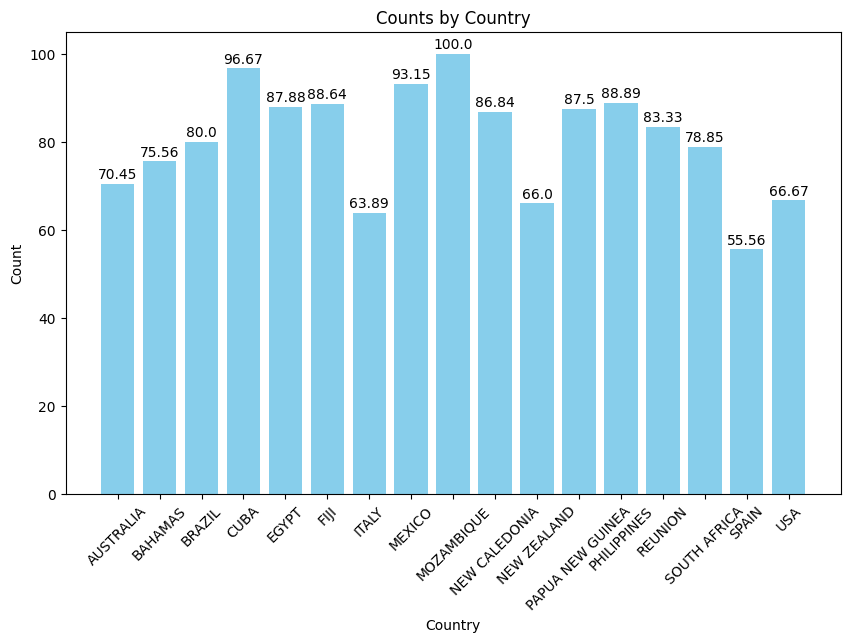

In [292]:
mortal = list(df_death['%Mortal'])
countries = list(df_death['Country'])

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, mortal, color='skyblue')

# Agregar los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')

plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('% Mortality')
plt.show()
